Đề tài: Hiệu suất và ứng dụng của Decision Tree, Naive Bayes và Linear Regression trong phân loại khách hàng thẻ tín dụng

Nhóm SVTH:
    Lê Nguyễn Minh Trung - 19521061,
    Võ Nữ Diễm Trang - 20521013,
    Trần Gia Phong - 20521748

In [2]:
#Import các thư viện cần thiết
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.lines as mlines

Import và tổng quan về dữ liệu

In [3]:
#Đọc tập tin dữ liệu
#Thầy có thể lấy dữ liệu từ link drive: https://drive.google.com/drive/folders/1Nzop-r37_0KJArbOpJLg8rzef2GxON1r?usp=drive_link
df = pd.read_csv('/TH_DataMining/Lab03/Dataset/BankChurners.csv')

In [4]:
df.shape

(10127, 23)

In [5]:
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,7.080821e+08,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,2.600000e+01,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,1.300000e+01,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1.438300e+03,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.000000e+00,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.000000e+00,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [7]:
df.info

<bound method DataFrame.info of        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income

In [8]:
#Checking for null values 
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

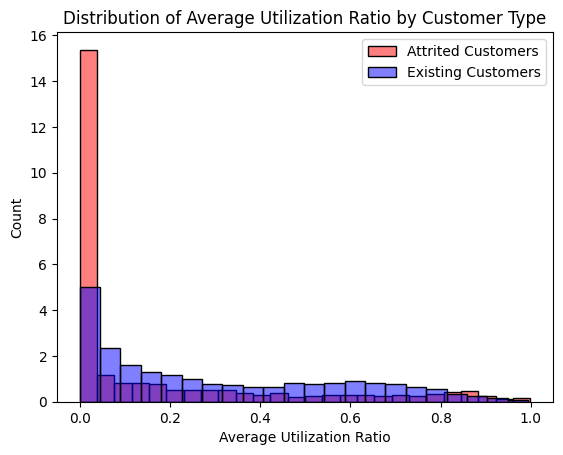

In [9]:
# Filter data for existing customers and attrited customers
existing_customers = df[df['Attrition_Flag'] == 'Existing Customer']
attrited_customers = df[df['Attrition_Flag'] == 'Attrited Customer']

# Create a histogram to compare the distributions
#used stat as density as we have huge difference in the number of exsisting customers and atrrited customers 

sns.histplot(attrited_customers['Avg_Utilization_Ratio'], label='Attrited Customers', color='red', alpha=0.5,stat='density')
sns.histplot(existing_customers['Avg_Utilization_Ratio'], label='Existing Customers', color='blue', alpha=0.5,stat='density')

# Set labels and title
plt.xlabel('Average Utilization Ratio')
plt.ylabel('Count')
plt.title('Distribution of Average Utilization Ratio by Customer Type')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
#Chúng ta có thể thấy sự khác biệt về tỷ lệ sử dụng với các khách hàng được phân bổ là rất thấp, tức là họ không bao giờ quan tâm đến việc sử dụng thẻ ngay từ đầu 
#hoặc sự khác biệt tiếp theo mà chúng ta thấy là ở mức độ sử dụng rất cao khi khách hàng sử dụng hết hạn mức trên thẻ. thẻ và có thể mặc định

#Tỷ lệ sử dụng trung bình có thể là một biến số rất hữu ích khi cố gắng xác định hành vi của khách hàng và ước tính liệu khách hàng có thể bị thu hút hay không.

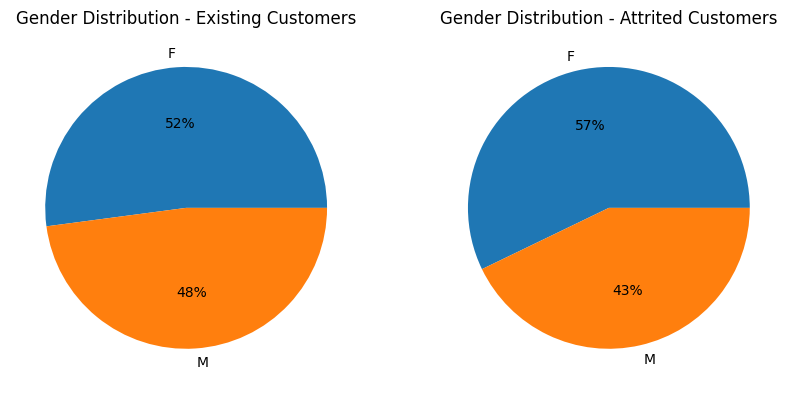

In [13]:
# Count the gender distribution for existing customers
existing_gender = df[df['Attrition_Flag'] == 'Existing Customer']['Gender'].value_counts()

# Count the gender distribution for attrited customers
attrited_gender = df[df['Attrition_Flag'] == 'Attrited Customer']['Gender'].value_counts()

# Create the figure and axes for the pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first pie chart for existing customers
ax1.pie(existing_gender, labels=existing_gender.index, autopct='%1.f%%')
ax1.set_title('Gender Distribution - Existing Customers')

# Plot the second pie chart for attrited customers
ax2.pie(attrited_gender, labels=attrited_gender.index, autopct='%1.f%%')
ax2.set_title('Gender Distribution - Attrited Customers')

# Show the pie charts
plt.show()

In [10]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

Tiền xử lý dữ liệu

In [11]:
#Loại bỏ các cột thuộc tính không liên quan
df = df.drop('CLIENTNUM', axis=1)
df = df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', axis=1)
df = df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', axis=1)

C:\Users\pc\AppData\Local\Temp\ipykernel_15624\2078894571.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'), annot=True)


<Axes: >

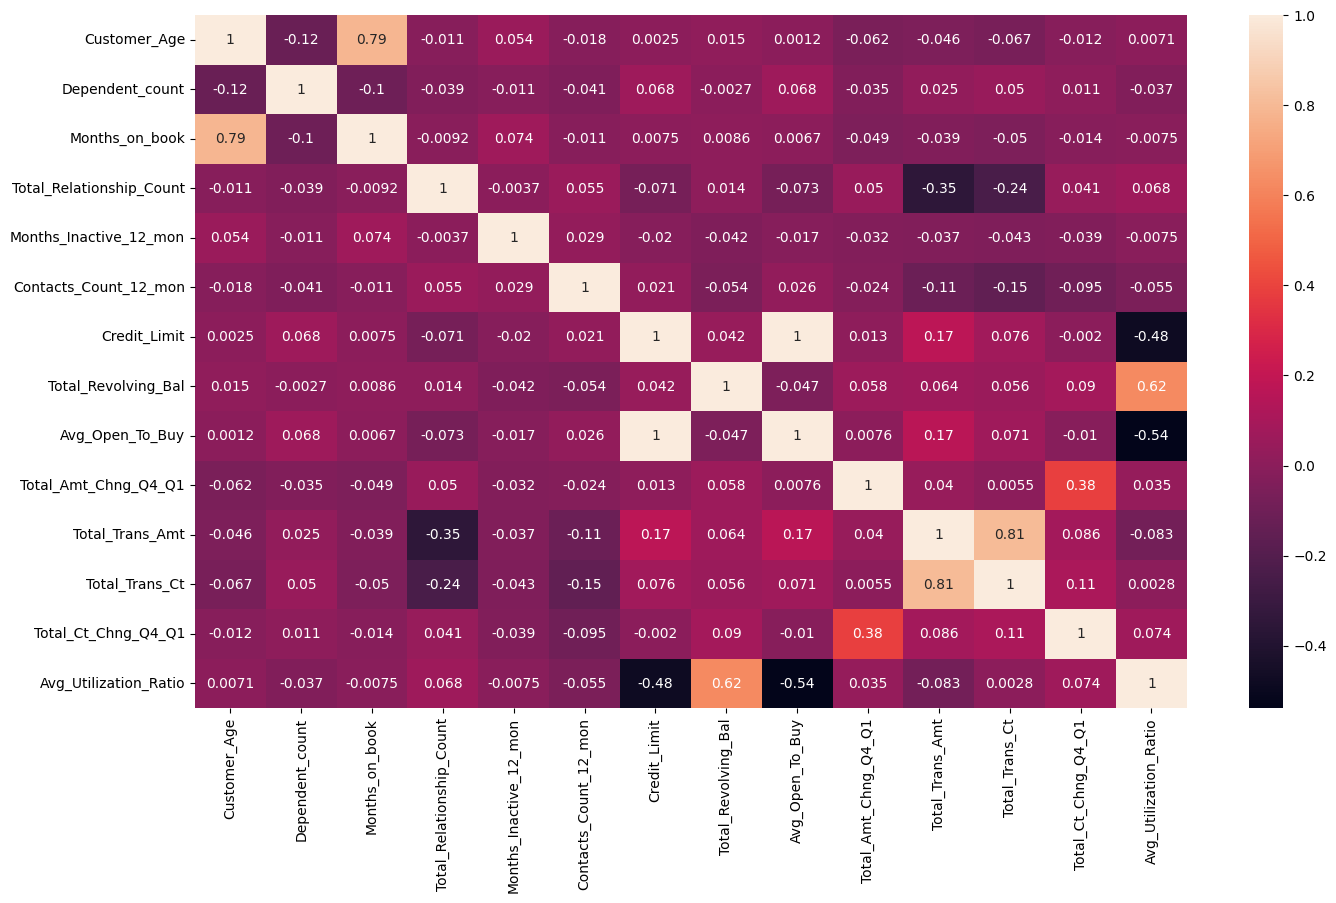

In [12]:
# Khảo sát độ tương đương đồng của các cột
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(method='pearson'), annot=True)

In [13]:
# Xác định các thuộc tính chứa giá trị "unknown"
unknown_columns = ['Marital_Status', 'Education_Level', 'Income_Category']

# Xác định thuộc tính quyết định
decision_column = 'Attrition_Flag'

# Lặp qua từng thuộc tính chứa giá trị "unknown"
for column in unknown_columns:
    # Tạo một DataFrame tạm thời chứa giá trị không rỗng và không phải "unknown"
    temp_df = df[df[column] != 'Unknown']
    
    # Tạo một Series với giá trị xuất hiện nhiều nhất trong thuộc tính, dựa trên thuộc tính quyết định
    most_frequent_value = temp_df.groupby(decision_column)[column].apply(lambda x: x.mode()[0])
    
    # Tạo một dictionary để ánh xạ giá trị "unknown" thành giá trị xuất hiện nhiều nhất
    replace_dict = dict(zip(most_frequent_value.index, most_frequent_value.values))
    
    # Thay thế giá trị "unknown" bằng giá trị xuất hiện nhiều nhất
    df[column] = np.where(df[column] == 'Unknown', df[decision_column].map(replace_dict), df[column])

In [14]:
#Chuyển các thuộc tính về dạng one-hot vector
one_hot_encoded_data = pd.get_dummies(df, columns = ['Gender','Card_Category','Income_Category','Education_Level','Marital_Status'])
one_hot_encoded_data

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_Less than $40K,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,Existing Customer,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,0,0,1,0,0,0,1,0
1,Existing Customer,49,5,44,6,1,2,8256.0,864,7392.0,...,1,0,0,1,0,0,0,0,0,1
2,Existing Customer,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,1,0,0,0,0,1,0
3,Existing Customer,40,4,34,3,4,1,3313.0,2517,796.0,...,1,0,0,0,1,0,0,0,1,0
4,Existing Customer,40,3,21,5,1,0,4716.0,0,4716.0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,2,40,3,2,3,4003.0,1851,2152.0,...,0,0,0,1,0,0,0,0,0,1
10123,Attrited Customer,41,2,25,4,2,3,4277.0,2186,2091.0,...,0,0,0,1,0,0,0,1,0,0
10124,Attrited Customer,44,1,36,5,3,4,5409.0,0,5409.0,...,1,0,0,0,1,0,0,0,1,0
10125,Attrited Customer,30,2,36,4,3,3,5281.0,0,5281.0,...,0,0,0,1,0,0,0,0,1,0


In [15]:
# Split the data into training, testing, and validation sets
x = one_hot_encoded_data.drop('Attrition_Flag', axis='columns')
y = one_hot_encoded_data['Attrition_Flag']
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

Thực hiện giải thuật Decision Tree

Fold 1:
Accuracy: 0.9387956564659428
Report:                    precision    recall  f1-score   support

Attrited Customer       0.84      0.80      0.82       351
Existing Customer       0.96      0.97      0.96      1675

         accuracy                           0.94      2026
        macro avg       0.90      0.89      0.89      2026
     weighted avg       0.94      0.94      0.94      2026

Fold 2:
Accuracy: 0.9501480750246791
Report:                    precision    recall  f1-score   support

Attrited Customer       0.85      0.84      0.84       322
Existing Customer       0.97      0.97      0.97      1704

         accuracy                           0.95      2026
        macro avg       0.91      0.90      0.91      2026
     weighted avg       0.95      0.95      0.95      2026

Fold 3:
Accuracy: 0.9308641975308642
Report:                    precision    recall  f1-score   support

Attrited Customer       0.78      0.82      0.80       343
Existing Customer       0.96    

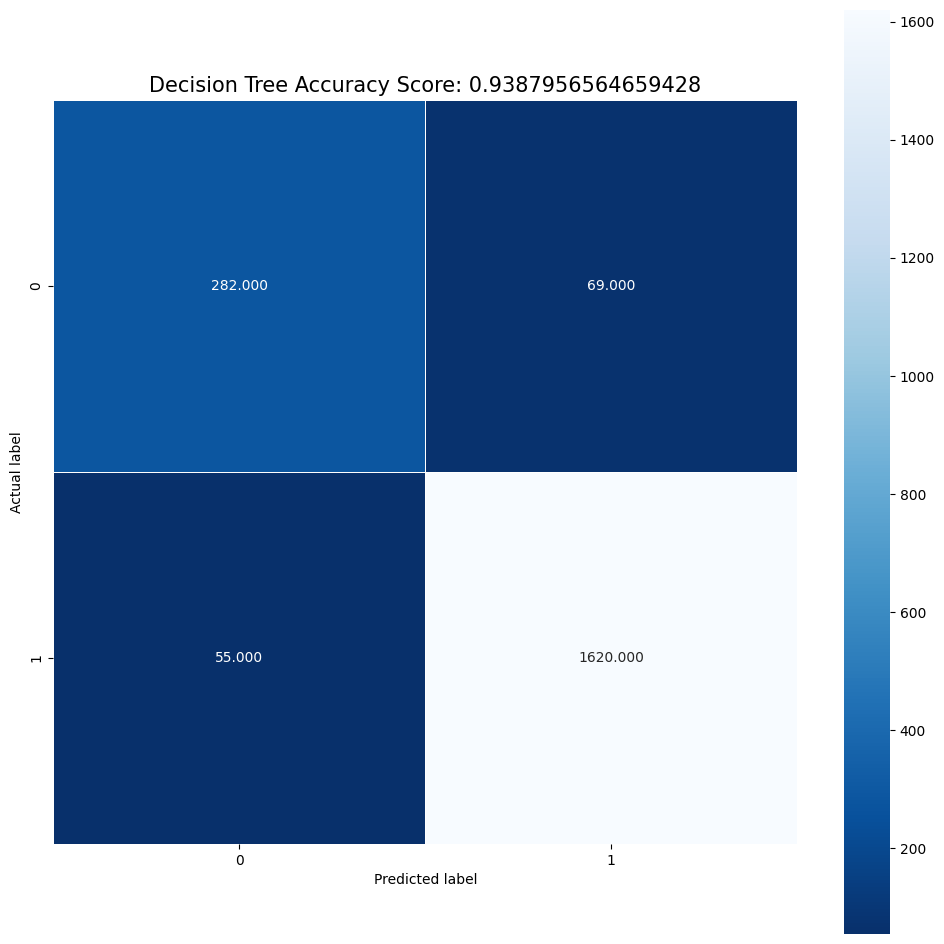

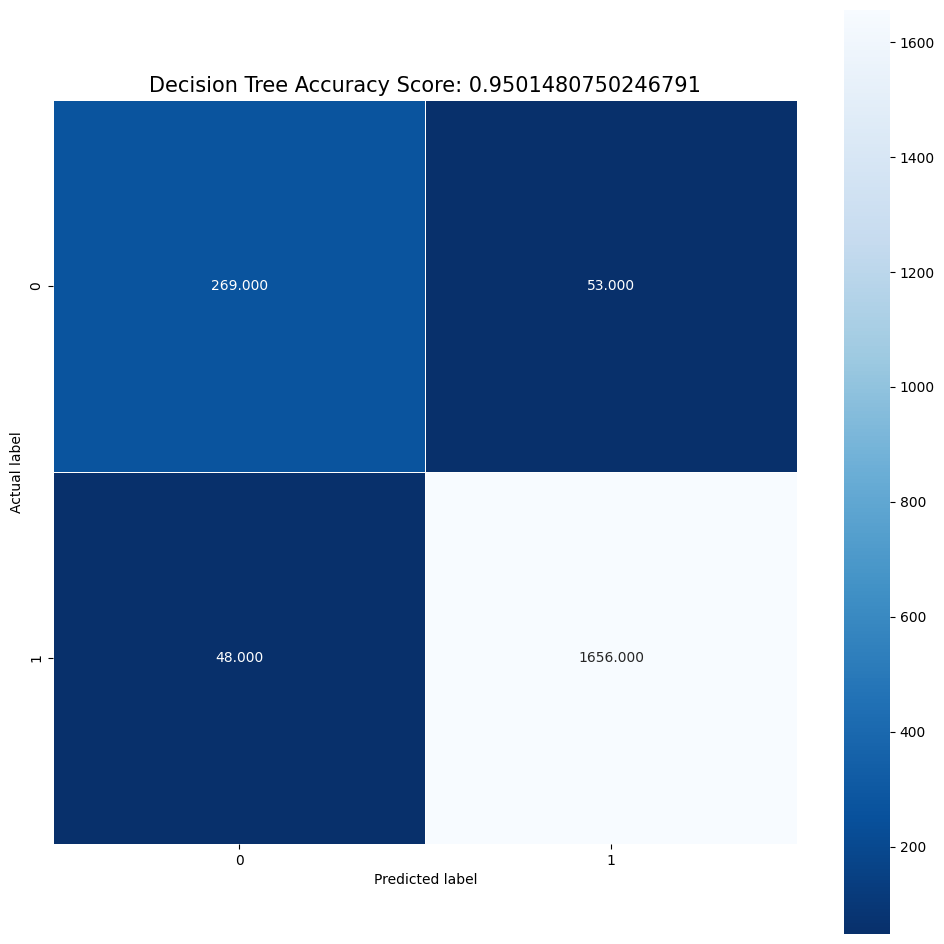

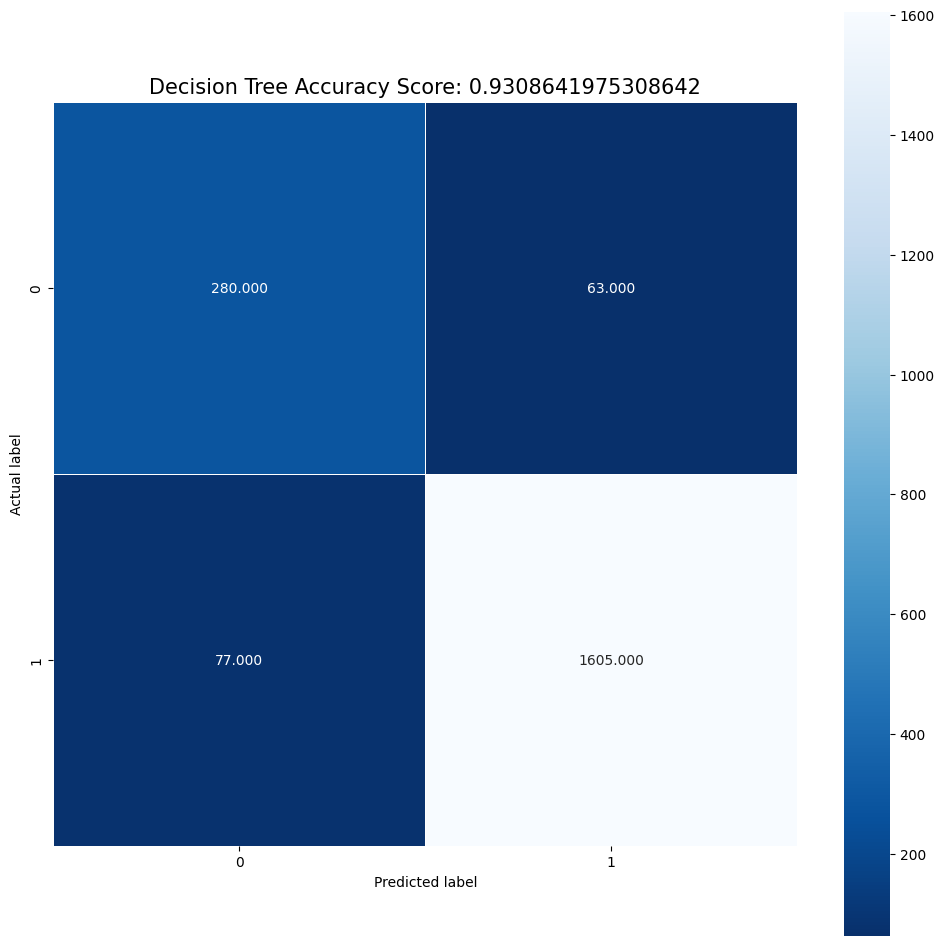

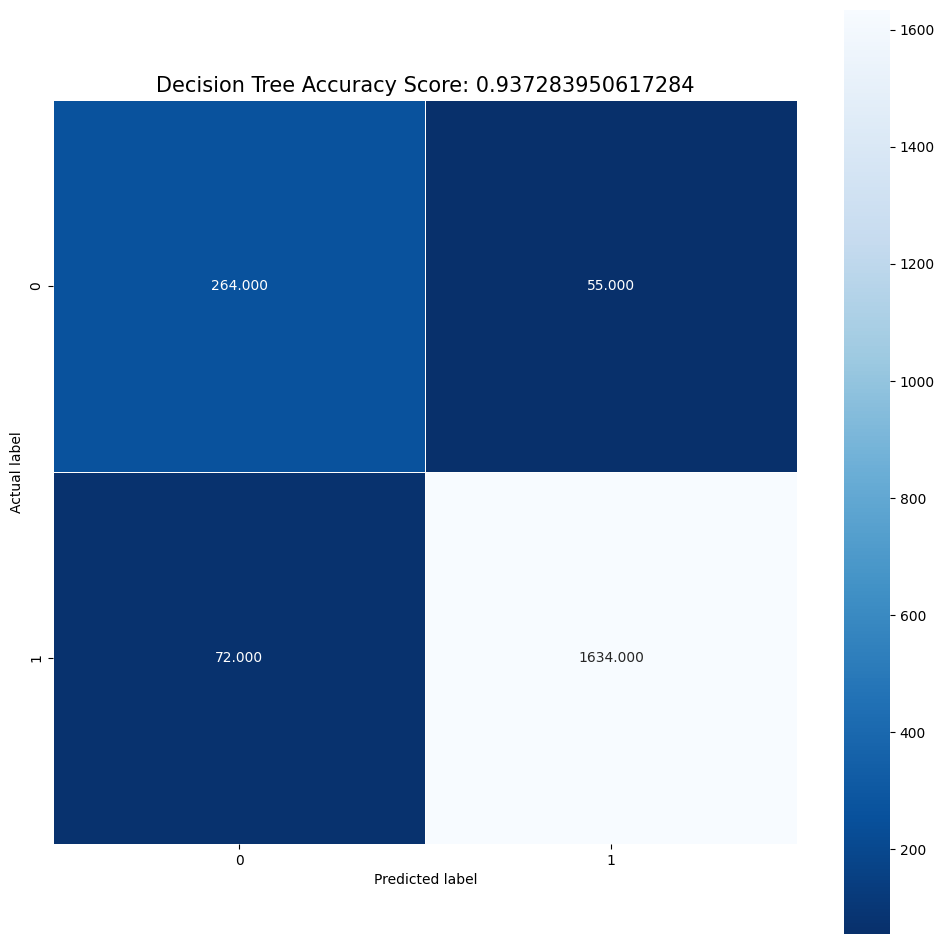

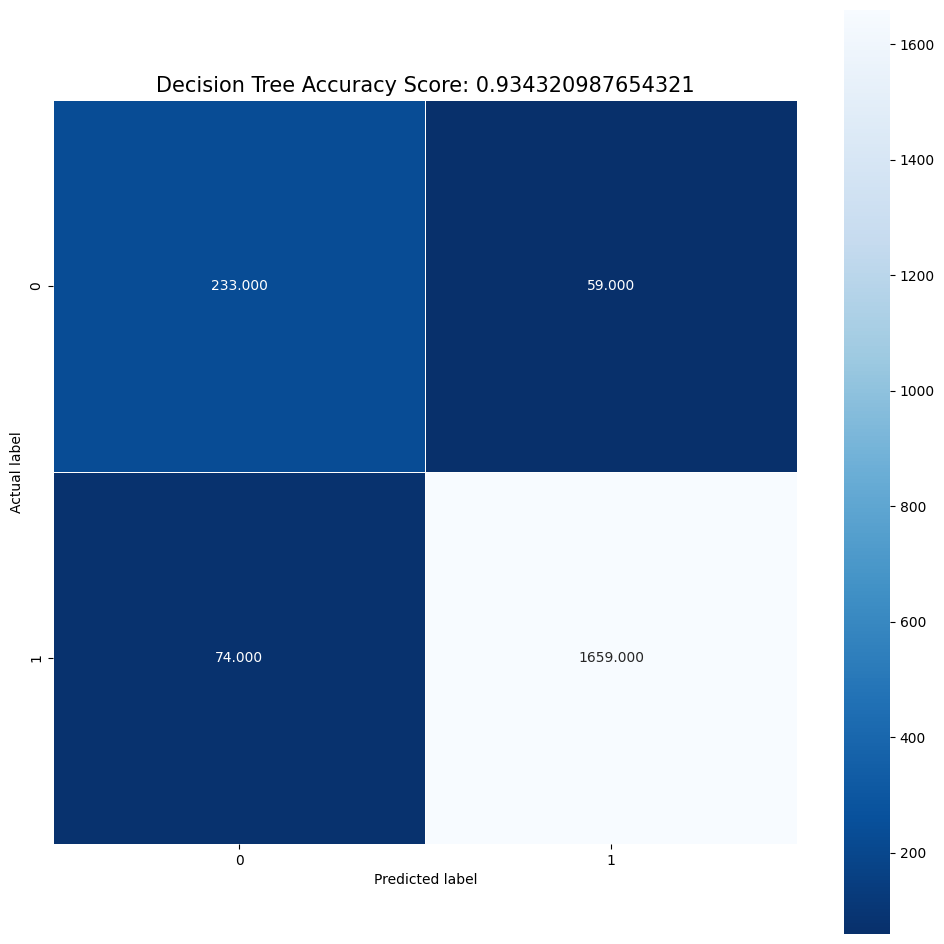

In [16]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Định nghĩa số lượng nhóm (số lượt Cross-Validation)
num_folds = 5

# Khởi tạo KFold object
kfold = KFold(n_splits=num_folds, random_state=5, shuffle=True)

# Tạo list để lưu các điểm dữ liệu train và test trong mỗi lượt Cross-Validation
train_indices = []
test_indices = []

# Chia dữ liệu thành các nhóm train và test
for train_index, test_index in kfold.split(x):
    train_indices.append(train_index)
    test_indices.append(test_index)

# Lặp qua từng lượt Cross-Validation và train/test mô hình
for fold in range(num_folds):
    print(f"Fold {fold+1}:")
    
    # Lấy chỉ mục train và test tương ứng với lượt Cross-Validation hiện tại
    train_index = train_indices[fold]
    test_index = test_indices[fold]
    
    # Lấy dữ liệu train và test từ chỉ mục
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Tiếp tục quá trình train và test mô hình tại đây
    clf = DecisionTreeClassifier(criterion="entropy", random_state=0)
    
    # Train Decision Tree Classifier
    clf.fit(x_train, y_train)
    
    # Dự đoán nhãn cho dữ liệu test
    y_pred = clf.predict(x_test)
    
    # Đánh giá độ chính xác
    tree_score = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:", tree_score)
    print("Report:", metrics.classification_report(y_test, y_pred))

    #Tính ma trận nhầm lẫn
    tree_cm = metrics.confusion_matrix(y_test, y_pred)

    #Biểu diễn lên đồ thị heatmap
    plt.figure(figsize=(12,12))
    sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
    plt.title(title, size=15)


Thực hiện giải thuật Naive Bayes

In [22]:
gnb = GaussianNB()
bayes_pred = gnb.fit(x_train, y_train).predict(x_test)

Fold 1:
Accuracy: 0.8933859822309971
Report:                    precision    recall  f1-score   support

Attrited Customer       0.73      0.62      0.67       351
Existing Customer       0.92      0.95      0.94      1675

         accuracy                           0.89      2026
        macro avg       0.82      0.78      0.80      2026
     weighted avg       0.89      0.89      0.89      2026

Fold 2:
Accuracy: 0.8938795656465943
Report:                    precision    recall  f1-score   support

Attrited Customer       0.70      0.58      0.64       322
Existing Customer       0.92      0.95      0.94      1704

         accuracy                           0.89      2026
        macro avg       0.81      0.77      0.79      2026
     weighted avg       0.89      0.89      0.89      2026

Fold 3:
Accuracy: 0.9076543209876543
Report:                    precision    recall  f1-score   support

Attrited Customer       0.77      0.66      0.71       343
Existing Customer       0.93    

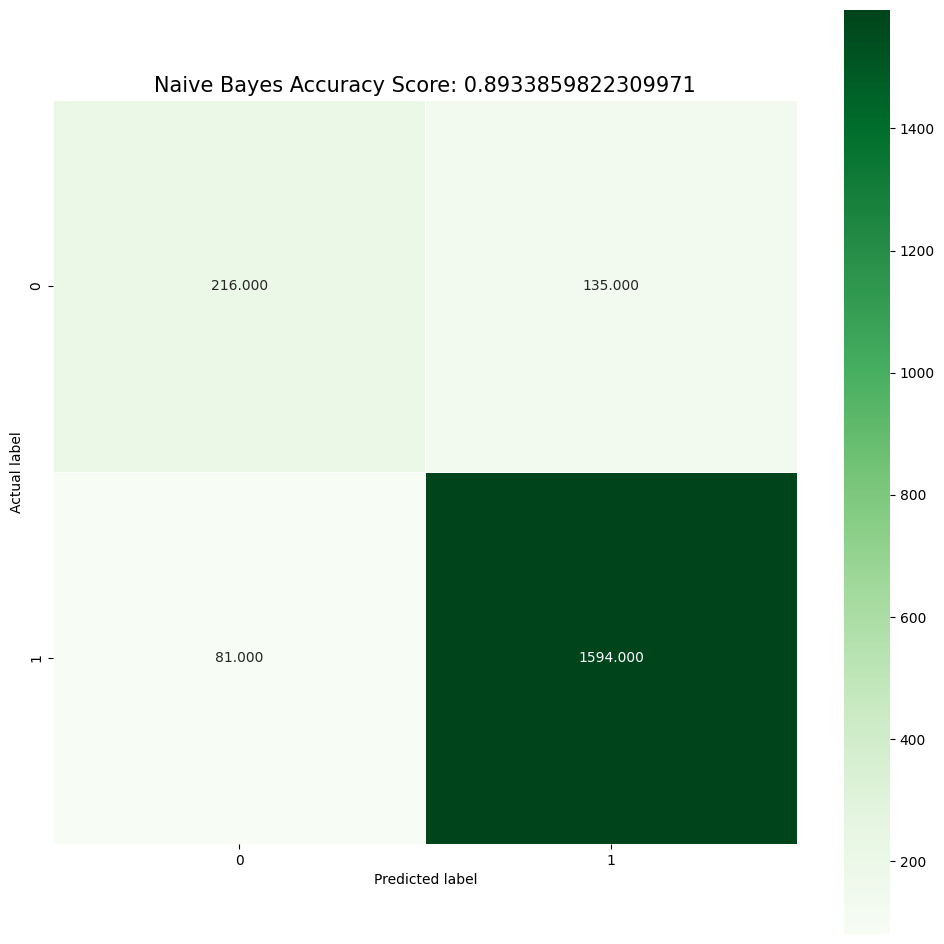

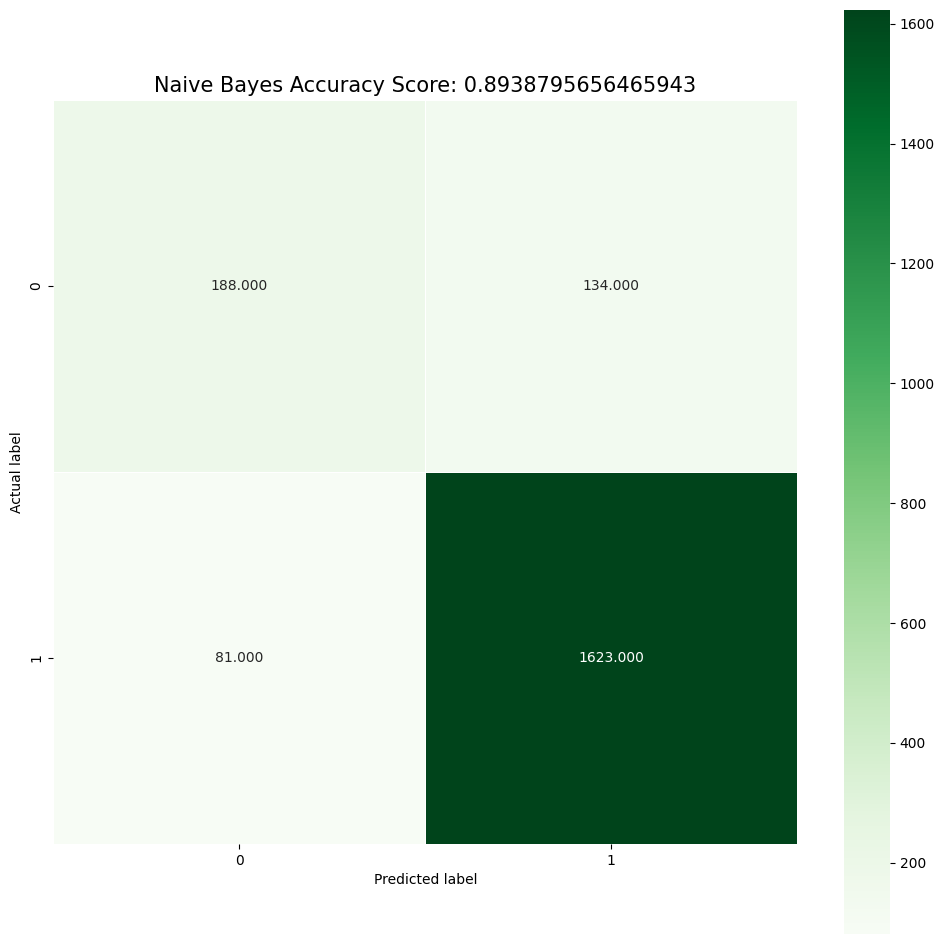

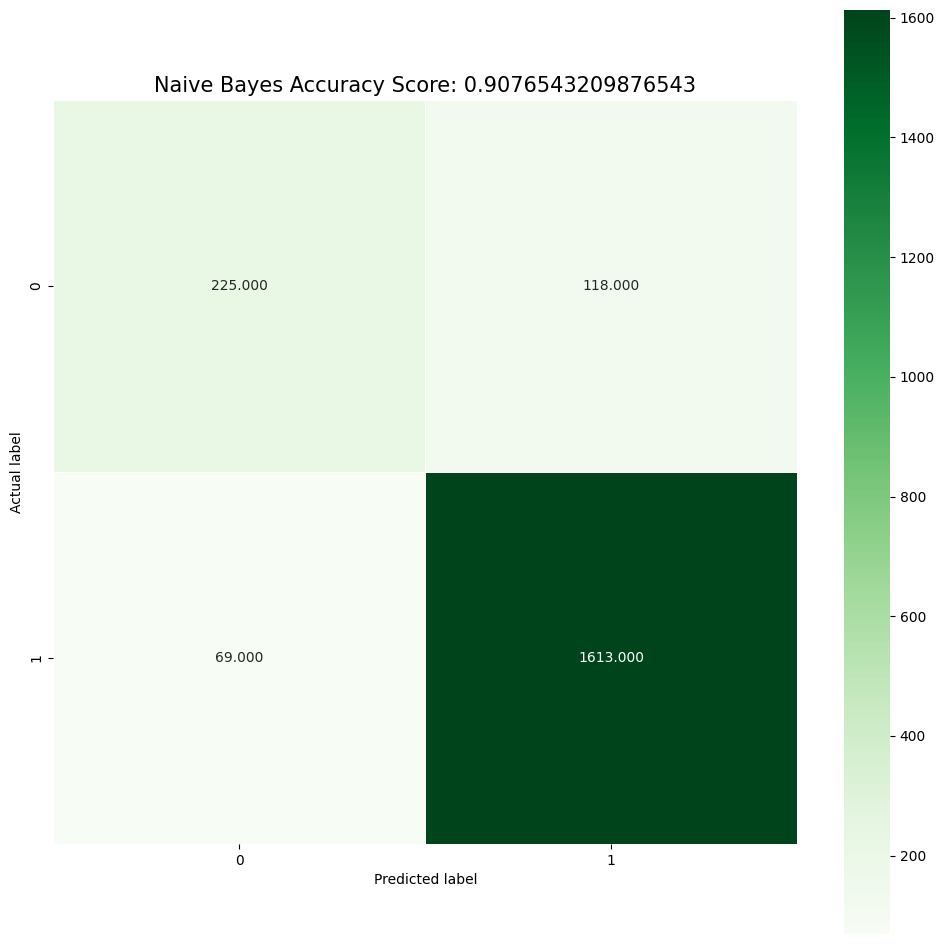

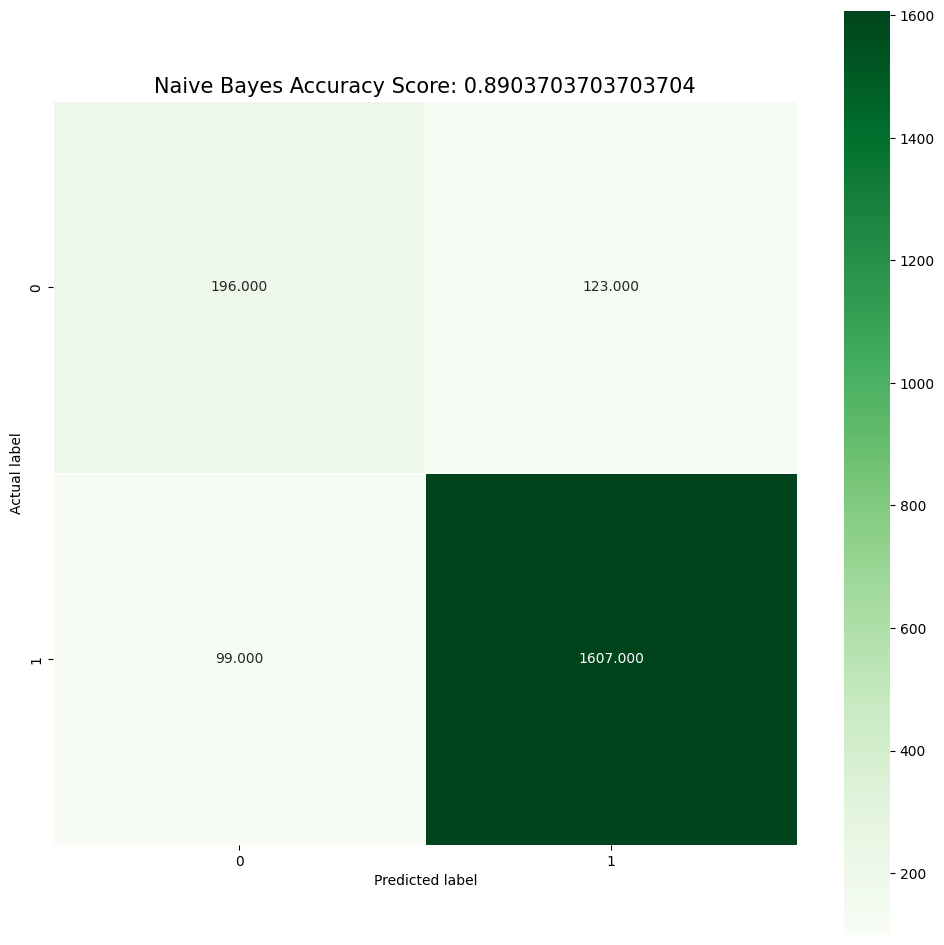

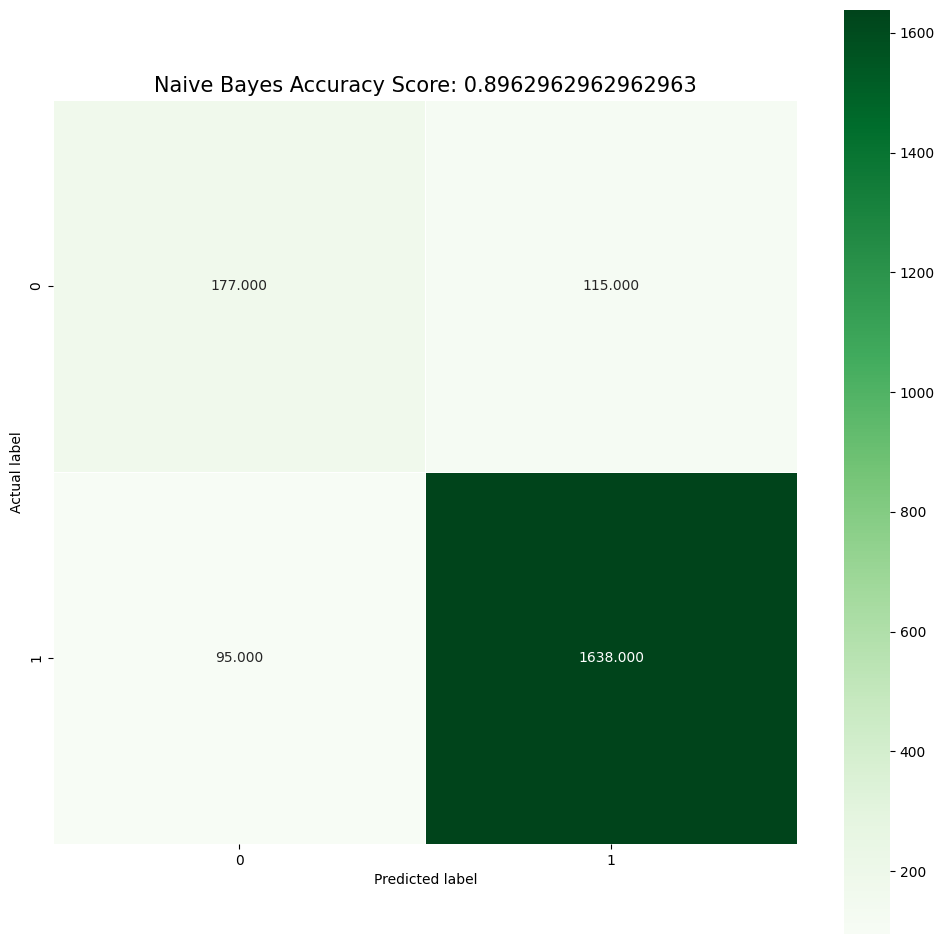

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Định nghĩa số lượng nhóm (số lượt Cross-Validation)
num_folds = 5

# Khởi tạo KFold object
kfold = KFold(n_splits=num_folds, random_state=5, shuffle=True)

# Tạo list để lưu các điểm dữ liệu train và test trong mỗi lượt Cross-Validation
train_indices = []
test_indices = []

# Chia dữ liệu thành các nhóm train và test
for train_index, test_index in kfold.split(x):
    train_indices.append(train_index)
    test_indices.append(test_index)

# Lặp qua từng lượt Cross-Validation và train/test mô hình
for fold in range(num_folds):
    print(f"Fold {fold+1}:")
    
    # Lấy chỉ mục train và test tương ứng với lượt Cross-Validation hiện tại
    train_index = train_indices[fold]
    test_index = test_indices[fold]
    
    # Lấy dữ liệu train và test từ chỉ mục
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Tiếp tục quá trình train và test mô hình tại đây
    gnb = GaussianNB()
    
    # Train Decision Tree Classifier
    bayes_pred = gnb.fit(x_train, y_train)
    
    # Dự đoán nhãn cho dữ liệu test
    y_pred = gnb.predict(x_test)
    
    # Đánh giá độ chính xác
    bayes_score = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:", bayes_score)
    print("Report:", metrics.classification_report(y_test, y_pred))

    #Tính ma trận nhầm lẫn
    tree_cm = metrics.confusion_matrix(y_test, y_pred)

    #Biểu diễn ma trận nhầm lẫn bằng đồ thị heatmap
    bayes_cm = metrics.confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(12,12))
    sns.heatmap(bayes_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Greens')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    title = 'Naive Bayes Accuracy Score: {0}'.format(bayes_score)
    plt.title(title, size=15)

Thực hiện giải thuật Linear Regression

In [35]:
one_hot_encoded_data['Attrition_Flag'] = one_hot_encoded_data['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})

In [36]:
# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(one_hot_encoded_data))
test_size = int(0.2 * len(one_hot_encoded_data))

train_data = one_hot_encoded_data[:train_size]
test_data = one_hot_encoded_data[train_size:train_size+test_size]

In [38]:
# Quá trình Training
x_train2 = np.array(train_data.index).reshape(-1, 1)
y_train2 = np.array(train_data['Attrition_Flag'])

In [39]:
# Train the linear regression model
linear_model = LinearRegression()
linear_model.fit(x_train2, y_train2)

LinearRegression()

In [41]:
# Quá trình testing 
x_test2 = np.array(test_data.index).reshape(-1, 1)
y_test2 = np.array(test_data['Attrition_Flag'])
y_pred = linear_model.predict(x_test2)

In [42]:
lr_pred=linear_model.fit(x_train2, y_train2).predict(x_test2)

In [44]:
# Đánh giá độ chính xác validate, test
test_rmse = np.sqrt(np.mean((y_pred - y_test2)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 0.4041718592912714


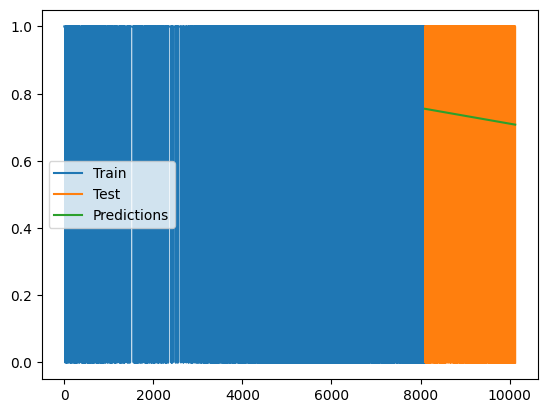

In [45]:
# Vẽ biểu đồ
plt.plot(train_data['Attrition_Flag'])
plt.plot(test_data['Attrition_Flag'])
plt.plot(test_data.index, y_pred)
plt.legend(['Train', 'Test', 'Predictions'])
plt.show()

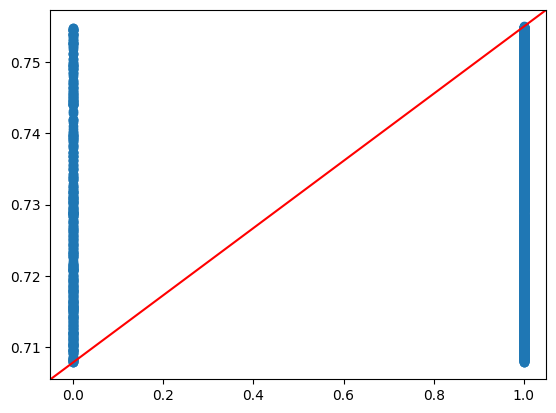

In [49]:
#Vẽ biểu đồ phân tán
fig, ax = plt.subplots()
ax.scatter(y_test2, y_pred)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

In [50]:
#Tính các chỉ số:
MSE = mean_squared_error(y_train2, linear_model.predict(x_train2))
MAE = mean_absolute_error(y_train2, linear_model.predict(x_train2))
R2 = r2_score(y_train2, linear_model.predict(x_train2))

print(MSE, MAE, R2)

0.12513324607705423 0.2502664921541084 0.023092464240389243


Một số thông số khác

In [22]:
X_c = one_hot_encoded_data.drop('Attrition_Flag', axis=1)

In [23]:
#Xếp hạng các đặc trưng quan trọng nhất của mô hình cây quyết định
importances = clf.feature_importances_

feature_importances = pd.DataFrame({'Feature': X_c.columns, 'Importance': importances})

feature_importances = feature_importances.sort_values('Importance', ascending=False)

print(feature_importances)

                           Feature  Importance
11                  Total_Trans_Ct    0.322388
10                 Total_Trans_Amt    0.182817
7              Total_Revolving_Bal    0.148372
12             Total_Ct_Chng_Q4_Q1    0.080557
3         Total_Relationship_Count    0.079057
9             Total_Amt_Chng_Q4_Q1    0.056462
0                     Customer_Age    0.030593
6                     Credit_Limit    0.016545
8                  Avg_Open_To_Buy    0.015386
4           Months_Inactive_12_mon    0.013290
5            Contacts_Count_12_mon    0.009718
13           Avg_Utilization_Ratio    0.008355
2                   Months_on_book    0.005772
32          Marital_Status_Married    0.005433
1                  Dependent_count    0.004269
27        Education_Level_Graduate    0.003754
23    Income_Category_$80K - $120K    0.002880
14                        Gender_F    0.002621
25         Education_Level_College    0.001861
22     Income_Category_$60K - $80K    0.001818
15           